<a href="https://colab.research.google.com/github/darockz659/ideal-octo-giggle/blob/master/Copy_of_unetL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import keras
from tqdm import tqdm

In [ ]:
!nvidia-smi

Sun Sep 12 15:51:11 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.63.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   62C    P8    30W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip '/content/drive/MyDrive/OUHANDS/OUHANDS.zip'

Archive:  /content/drive/MyDrive/OUHANDS/OUHANDS.zip
replace archive/annos/A-ima-0001.xml? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
IMG_WIDTH = 320
IMG_HEIGHT = 320
IMG_CHANNELS = 3

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = '/content/archive/OUHANDS_train/train/hand_data/colour'

maskpath ='/content/archive/OUHANDS_train/train/hand_data/segmentation'

X_train = np.zeros((len(os.listdir(path)), IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
Y_train = np.zeros((len(os.listdir(maskpath)), IMG_HEIGHT, IMG_WIDTH,1))

print('creating input data')
n=0
for name in tqdm(os.listdir(path)):
    newpath = os.path.join(path,name)
    img=cv2.imread(newpath)
    img=cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
    X_train[n]=img
    n+=1

m=0
for name in tqdm(os.listdir(maskpath)):
    newmaskpath = os.path.join(maskpath,name)
    mpg=cv2.imread(newmaskpath,0)
    mpg=cv2.resize(mpg,(IMG_WIDTH,IMG_HEIGHT))
    mpg=np.expand_dims(mpg,axis=-1)
    Y_train[m]=mpg/255
    m+=1


creating input data


100%|██████████| 2000/2000 [00:04<00:00, 478.63it/s]


In [ ]:
from sklearn.model_selection import StratifiedKFold

# New section

In [ ]:
X_train.shape

(2000, 320, 320, 3)

In [ ]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

#Contraction path

c1 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.ReLU()(c1)
c1 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.ReLU()(c1)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c1)
c1 = tf.keras.layers.BatchNormalization()(c1)
c1 = tf.keras.layers.ReLU()(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

c2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.ReLU()(c2)
c2 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.ReLU()(c2)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c2)
c2 = tf.keras.layers.BatchNormalization()(c2)
c2 = tf.keras.layers.ReLU()(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

c3 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.ReLU()(c3)
c3 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.ReLU()(c3)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c3)
c3 = tf.keras.layers.BatchNormalization()(c3)
c3 = tf.keras.layers.ReLU()(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

c4 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.ReLU()(c4)
c4 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.ReLU()(c4)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c4)
c4 = tf.keras.layers.BatchNormalization()(c4)
c4 = tf.keras.layers.ReLU()(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)
c5 = tf.keras.layers.Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
c5 = tf.keras.layers.BatchNormalization()(c5)
c5 = tf.keras.layers.ReLU()(c5)

#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.ReLU()(c6)
c6 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.ReLU()(c6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c6)
c6 = tf.keras.layers.BatchNormalization()(c6)
c6 = tf.keras.layers.ReLU()(c6)
 
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.ReLU()(c7)
c7 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.ReLU()(c7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
c7 = tf.keras.layers.BatchNormalization()(c7)
c7 = tf.keras.layers.ReLU()(c7)
 
u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.ReLU()(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.ReLU()(c8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
c8 = tf.keras.layers.BatchNormalization()(c8)
c8 = tf.keras.layers.ReLU()(c8)
 
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.ReLU()(c9)
c9 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.ReLU()(c9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
c9 = tf.keras.layers.BatchNormalization()(c9)
c9 = tf.keras.layers.ReLU()(c9)
 
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
 
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 320, 320, 3) 0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 320, 320, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 320, 320, 16) 448         lambda[0][0]                     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 320, 320, 16) 64          conv2d[0][0]                     
______________________________________________________________________________________________

In [ ]:
def UNETmod():
  #Build the model
  inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
  s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

  #Contraction path

  c1 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(s)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c1 = tf.keras.layers.ReLU()(c1)
  c1 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c1)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c1 = tf.keras.layers.ReLU()(c1)
  c1 = tf.keras.layers.Dropout(0.1)(c1)
  c1 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c1)
  c1 = tf.keras.layers.BatchNormalization()(c1)
  c1 = tf.keras.layers.ReLU()(c1)
  p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

  c2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(p1)
  c2 = tf.keras.layers.BatchNormalization()(c2)
  c2 = tf.keras.layers.ReLU()(c2)
  c2 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c2)
  c2 = tf.keras.layers.BatchNormalization()(c2)
  c2 = tf.keras.layers.ReLU()(c2)
  c2 = tf.keras.layers.Dropout(0.1)(c2)
  c2 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c2)
  c2 = tf.keras.layers.BatchNormalization()(c2)
  c2 = tf.keras.layers.ReLU()(c2)
  p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

  c3 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(p2)
  c3 = tf.keras.layers.BatchNormalization()(c3)
  c3 = tf.keras.layers.ReLU()(c3)
  c3 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c3)
  c3 = tf.keras.layers.BatchNormalization()(c3)
  c3 = tf.keras.layers.ReLU()(c3)
  c3 = tf.keras.layers.Dropout(0.2)(c3)
  c3 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c3)
  c3 = tf.keras.layers.BatchNormalization()(c3)
  c3 = tf.keras.layers.ReLU()(c3)
  p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

  c4 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(p3)
  c4 = tf.keras.layers.BatchNormalization()(c4)
  c4 = tf.keras.layers.ReLU()(c4)
  c4 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c4)
  c4 = tf.keras.layers.BatchNormalization()(c4)
  c4 = tf.keras.layers.ReLU()(c4)
  c4 = tf.keras.layers.Dropout(0.2)(c4)
  c4 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c4)
  c4 = tf.keras.layers.BatchNormalization()(c4)
  c4 = tf.keras.layers.ReLU()(c4)
  p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

  c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(p4)
  c5 = tf.keras.layers.BatchNormalization()(c5)
  c5 = tf.keras.layers.ReLU()(c5)
  c5 = tf.keras.layers.Conv2D(512, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
  c5 = tf.keras.layers.BatchNormalization()(c5)
  c5 = tf.keras.layers.ReLU()(c5)
  c5 = tf.keras.layers.Dropout(0.3)(c5)
  c5 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c5)
  c5 = tf.keras.layers.BatchNormalization()(c5)
  c5 = tf.keras.layers.ReLU()(c5)

  #Expansive path 
  u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
  u6 = tf.keras.layers.concatenate([u6, c4])
  c6 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(u6)
  c6 = tf.keras.layers.BatchNormalization()(c6)
  c6 = tf.keras.layers.ReLU()(c6)
  c6 = tf.keras.layers.Conv2D(256, (3, 3), kernel_initializer='he_normal', padding='same')(c6)
  c6 = tf.keras.layers.BatchNormalization()(c6)
  c6 = tf.keras.layers.ReLU()(c6)
  c6 = tf.keras.layers.Dropout(0.2)(c6)
  c6 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c6)
  c6 = tf.keras.layers.BatchNormalization()(c6)
  c6 = tf.keras.layers.ReLU()(c6)
  
  u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
  u7 = tf.keras.layers.concatenate([u7, c3])
  c7 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(u7)
  c7 = tf.keras.layers.BatchNormalization()(c7)
  c7 = tf.keras.layers.ReLU()(c7)
  c7 = tf.keras.layers.Conv2D(128, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
  c7 = tf.keras.layers.BatchNormalization()(c7)
  c7 = tf.keras.layers.ReLU()(c7)
  c7 = tf.keras.layers.Dropout(0.2)(c7)
  c7 = tf.keras.layers.Conv2D(64, (3, 3), kernel_initializer='he_normal', padding='same')(c7)
  c7 = tf.keras.layers.BatchNormalization()(c7)
  c7 = tf.keras.layers.ReLU()(c7)
  
  u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
  u8 = tf.keras.layers.concatenate([u8, c2])
  c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(u8)
  c8 = tf.keras.layers.BatchNormalization()(c8)
  c8 = tf.keras.layers.ReLU()(c8)
  c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
  c8 = tf.keras.layers.BatchNormalization()(c8)
  c8 = tf.keras.layers.ReLU()(c8)
  c8 = tf.keras.layers.Dropout(0.1)(c8)
  c8 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c8)
  c8 = tf.keras.layers.BatchNormalization()(c8)
  c8 = tf.keras.layers.ReLU()(c8)
  
  u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
  u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
  c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(u9)
  c9 = tf.keras.layers.BatchNormalization()(c9)
  c9 = tf.keras.layers.ReLU()(c9)
  c9 = tf.keras.layers.Conv2D(32, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
  c9 = tf.keras.layers.BatchNormalization()(c9)
  c9 = tf.keras.layers.ReLU()(c9)
  c9 = tf.keras.layers.Dropout(0.1)(c9)
  c9 = tf.keras.layers.Conv2D(16, (3, 3), kernel_initializer='he_normal', padding='same')(c9)
  c9 = tf.keras.layers.BatchNormalization()(c9)
  c9 = tf.keras.layers.ReLU()(c9)
  
  outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)
  
  model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
model=UNETmod()

In [ ]:
#Model Checkpoint
checkpoint_path_recog = "/content/drive/MyDrive/OUHANDS/unet/checkp.ckpt"
model_checkpoint_recog = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path_recog,
                                                 save_weights_only=True,
                                                  monitor='val_accuracy',save_best_only=True,
                                                 verbose=1)

In [ ]:
OUTPUT = model.fit(X_train,Y_train,validation_split = 0.1,batch_size=8,epochs=10,callbacks=[model_checkpoint_recog])

Epoch 1/10
225/225 [==============================] - 181s 654ms/step - loss: 0.1940 - accuracy: 0.9473 - val_loss: 0.4403 - val_accuracy: 0.8905

Epoch 00001: val_accuracy improved from -inf to 0.89051, saving model to /content/drive/MyDrive/OUHANDS/unet/checkp.ckpt
Epoch 2/10
225/225 [==============================] - 146s 650ms/step - loss: 0.0740 - accuracy: 0.9761 - val_loss: 0.0758 - val_accuracy: 0.9714

Epoch 00002: val_accuracy improved from 0.89051 to 0.97140, saving model to /content/drive/MyDrive/OUHANDS/unet/checkp.ckpt
Epoch 3/10
225/225 [==============================] - 146s 649ms/step - loss: 0.0556 - accuracy: 0.9788 - val_loss: 0.0638 - val_accuracy: 0.9748

Epoch 00003: val_accuracy improved from 0.97140 to 0.97479, saving model to /content/drive/MyDrive/OUHANDS/unet/checkp.ckpt
Epoch 4/10
225/225 [==============================] - 146s 651ms/step - loss: 0.0435 - accuracy: 0.9820 - val_loss: 0.0474 - val_accuracy: 0.9797

Epoch 00004: val_accuracy improved from 0.9

In [ ]:
pred_train=model.predict(X_train[:int(X_train.shape[0])],verbose=1)

pred_train_t = (pred_train>0.5).astype(np.uint8)

63/63 [==============================] - 45s 630ms/step


In [ ]:
for i in range(pred_train_t.shape[0]):
  name="seg"+str(i)+".jpg"
  img=np.reshape(pred_train_t[i],(IMG_HEIGHT,IMG_WIDTH))
  img=255*img
  cv2.imwrite(name,img)

In [ ]:
for i in range(pred_train_t.shape[0]):
  name="mask"+str(i)+".jpg"
  img=np.reshape(Y_train[i],(IMG_HEIGHT,IMG_WIDTH))
  img=255*img
  cv2.imwrite(name,img)

In [ ]:
!ls


archive       mask15.jpg    mask400.jpg  seg1000.jpg  seg1602.jpg  seg403.jpg
drive	      mask1600.jpg  mask401.jpg  seg1001.jpg  seg1603.jpg  seg404.jpg
mask0.jpg     mask1601.jpg  mask402.jpg  seg1002.jpg  seg1604.jpg  seg405.jpg
mask1000.jpg  mask1602.jpg  mask403.jpg  seg1003.jpg  seg1605.jpg  seg406.jpg
mask1001.jpg  mask1603.jpg  mask404.jpg  seg1004.jpg  seg1606.jpg  seg407.jpg
mask1002.jpg  mask1604.jpg  mask405.jpg  seg1005.jpg  seg1607.jpg  seg408.jpg
mask1003.jpg  mask1605.jpg  mask406.jpg  seg1006.jpg  seg1608.jpg  seg409.jpg
mask1004.jpg  mask1606.jpg  mask407.jpg  seg1007.jpg  seg1609.jpg  seg40.jpg
mask1005.jpg  mask1607.jpg  mask408.jpg  seg1008.jpg  seg160.jpg   seg410.jpg
mask1006.jpg  mask1608.jpg  mask409.jpg  seg1009.jpg  seg1610.jpg  seg411.jpg
mask1007.jpg  mask1609.jpg  mask40.jpg	 seg100.jpg   seg1611.jpg  seg412.jpg
mask1008.jpg  mask160.jpg   mask410.jpg  seg1010.jpg  seg1612.jpg  seg413.jpg
mask1009.jpg  mask1610.jpg  mask411.jpg  seg1011.jpg  seg1613.jpg  s

In [ ]:
X_train.shape

(2000, 320, 320, 3)

In [ ]:
drive.mount("/content/drive/", force_remount=True)

Mounted at /content/drive/


In [ ]:
path = "/content/archive/OUHANDS_test/test/hand_data/colour"
maskpath = "/content/archive/OUHANDS_test/test/hand_data/segmentation"

X_test = np.zeros((len(os.listdir(path)), IMG_HEIGHT, IMG_WIDTH,IMG_CHANNELS),dtype=np.uint8)
Y_test = np.zeros((len(os.listdir(maskpath)), IMG_HEIGHT, IMG_WIDTH,1))
print('creating test data')
n=0
for name in tqdm(os.listdir(path)):
    newpath = os.path.join(path,name)
    img=cv2.imread(newpath)
    img=cv2.resize(img,(IMG_WIDTH,IMG_HEIGHT))
    X_test[n]=img
    n+=1

m=0
for name in tqdm(os.listdir(maskpath)):
    newmaskpath = os.path.join(maskpath,name)
    mpg=cv2.imread(newmaskpath,0)
    mpg=cv2.resize(mpg,(IMG_WIDTH,IMG_HEIGHT))
    mpg=np.expand_dims(mpg,axis=-1)
    Y_test[m]=mpg/255
    m+=1

creating test data


100%|██████████| 1000/1000 [00:02<00:00, 434.49it/s]


In [ ]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from sklearn.metrics import f1_score

In [ ]:
def fscore(tp,Images,Masks):
    total=0
    i=0
    fs=0
    for i in range(len(Images)):
        total += 1
        
        tp[i][tp[i]>0.5]=1
        tp[i][tp[i]<0.5]=0

        pred = img_to_array(tp[i]).astype(int)
        label = img_to_array(np.squeeze(Masks[i], axis=2)).astype(int)
        flat_pred = np.ravel(pred)
        flat_label = np.ravel(label)

        fs += f1_score(flat_label,flat_pred, average='micro')

    fs=fs/total

    return fs  

In [ ]:
 #    ######evaluate#####
model.load_weights(checkpoint_path_recog)
y_pred=model.predict(X_test)
f=fscore(y_pred,X_test,Y_test)
print(f)

0.969420917968751


Text(0.5, 1.0, 'TEST IMAGE')

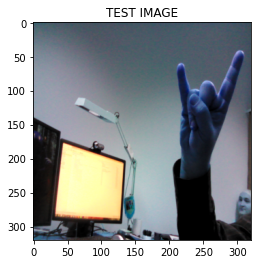

In [ ]:
plt.imshow(array_to_img(X_test[0]))
plt.title('TEST IMAGE')

Text(0.5, 1.0, 'TEST SEGMENTATION MASK GROUND TRUTH')

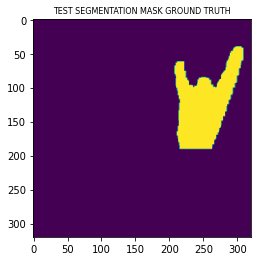

In [ ]:
plt.imshow(array_to_img(Y_test[0]))
plt.title('TEST SEGMENTATION MASK GROUND TRUTH', fontsize=8)

Text(0.5, 1.0, 'TEST SEGMENTATION MASK OBTAINED FROM DEEP LEARNING MODULE')

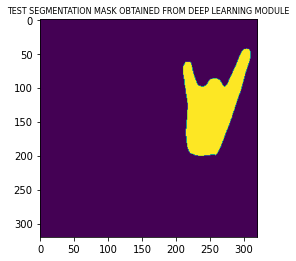

In [ ]:
plt.imshow(array_to_img(y_pred[0]))
plt.title('TEST SEGMENTATION MASK OBTAINED FROM DEEP LEARNING MODULE', fontsize=8)

In [ ]:
x_test_single = np.expand_dims(X_test[7], axis = 0)

In [ ]:
import time
start_time = time.time()
y_single = model.predict(x_test_single)
print("--- %s seconds ---" % (time.time() - start_time))

--- 0.847048282623291 seconds ---
